In [3]:
import matplotlib.pyplot as plt
import numpy as np
from math import sqrt

In [4]:
# given data to be used for search algorithms

imageTable = np.array([[178,228,14,164,246,210,82,79,14,157,230,154,145,204,28,178],                       
                       [239,104,202,194,64,21,225,182,255,50,100,215,75,177,118,239],                       
                       [216,155,78,195,38,3,105,101,92,172,179,24,21,43,172,216],                       
                       [110,99,189,54,187,86,29,167,32,140,91,189,10,46,123,110],                       
                       [28,172,166,157,34,35,18,118,74,241,119,88,146,92,212,28],                       
                       [61,97,165,129,222,93,223,56,57,215,155,242,102,121,249,61],                       
                       [149,69,22,220,77,146,47,68,232,203,16,221,150,65,225,149],                       
                       [135,100,192,110,174,131,41,248,141,124,19,178,180,201,51,135],                       
                       [251,117,102,31,57,161,146,123,244,161,61,51,41,33,158,251],                       
                       [47,235,136,252,186,65,145,138,159,228,169,195,66,244,56,47],                       
                       [165,63,194,127,53,79,3,21,85,8,185,41,212,141,38,165],                       
                       [20,249,177,38,50,227,156,144,49,41,230,245,49,245,253,20],                       
                       [195,121,21,95,197,243,116,230,235,4,86,204,191,148,150,195],                       
                       [224,26,207,78,12,95,189,67,105,72,212,215,245,249,60,224],                       
                       [5,8,7,98,233,176,124,251,220,129,82,236,222,137,7,5],                       
                       [178,228,14,164,246,210,82,79,14,157,230,154,145,204,28,178]])

searchTemplate = np.array([[123, 250,185],[170,24,20], [117,102,31]] )

### Sum of squared differences
A small helper function used by the block search algorithms for scoring

In [5]:
def SSD(area, search):

    shape1 = np.shape(area)
    shape2 = np.shape(search)

    # catch shape mismatch
    if (shape1 != shape2):
        print("Shape mismatch, first input shape:", shape1, "second shape", shape2)
        return -1

    ssd = 0
    for i in range(0, shape1[0]):
        for j in range(0, shape1[1]):
            difference = area[i][j] - search[i][j]
            ssd += difference**2

    return ssd

## Block Search
The following function represent different block search approaches. We later compare the performance and difference of these approaches.

In [6]:
def full_search(image, template):

    # find the size of the image
    shape = np.shape(image)

    #find the size of the template
    tempShape = np.shape(template)

    # Find the margins for the template kernal size to offset
    # the center of the kernel
    margin = np.array([int((tempShape[0] - 1) / 2), int((tempShape[1] - 1) / 2)])

    results = []
    for y in range(0, shape[1] - tempShape[1]):
        for x in range(0, shape[0] - tempShape[0]):
            xx = x + tempShape[0]
            yy = y + tempShape[1]
            score = SSD(image[x:xx, y:yy], template)
            results.append([score, [x, y]])

    results.sort(key = lambda x: x[0])
    results[0][1] = results[0][1] + margin
    
    # create a tuple for return
    bestMatch = (results[0][0], ((results[0][1][0], results[0][1][1])))

    return bestMatch

In [28]:
fullSearchScore = full_search(imageTable, searchTemplate)
print('The highest scoring point in the image is (score, point): ')
print(fullSearchScore)

The highest scoring point in the image is (score, point): 
(15463, (1, 4))


In [12]:
def three_stage(image, template):

    # find the size of the image
    shape = np.shape(image)
    shape = np.array(shape)
    center = np.array([int(shape[0]/2), int(shape[1]/2)])

    #find the size of the template
    tempShape = np.shape(template)
    tempShape = np.array(tempShape)

    
    # create margins for slicing based on the kernel size
    margin = np.array([int((tempShape[0] - 1) / 2), int((tempShape[1] - 1) / 2)])

    # create our first step size
    step = shape - center
    step = np.floor_divide(step, 2)

    # start pixel for first round is the step size
    start = step.copy() - 1
    end = step*3

    for i in range (0, 3):
        # create a list for our scores
        scoreList = []
        print('Search stage: ', end='')
        print(i)
        for y in range(start[1], end[1], step[1]):
            for x in range(start[0], end[0], step[0]):
                # create our slice boundries
                x1 = x - margin[0]
                y1 = y - margin[1]
                x2 = x + tempShape[0] - 1
                y2 = y + tempShape[1] - 1
                print('Current search location (x, y): ', end = '')
                print(x, y)
                score = SSD(image[x1:x2, y1:y2], template)
                scoreList.append([score, [x, y]])
                
        # sort the scores for each round
        scoreList.sort(key = lambda x: x[0])
        # reduce the step to half the last step size
        step = np.floor_divide(step, 2)
        # the new start location is the best score offset by the new step size
        start = scoreList[0][1] - step
        end = start + step*3
        print('Highest scoring location: ', end='')
        print(scoreList[0])
        print('Next phase [step size, start location]: ', end='')
        print(step, start)

    scoreList[0][1] = scoreList[0][1] + margin
    # create a tuple for return
    bestMatch = (scoreList[0][0], ((scoreList[0][1][0], scoreList[0][1][1])))
    return bestMatch

In [13]:
threeStageScore = three_stage(imageTable, searchTemplate)
print(threeStageScore)

Search stage: 0
Current search location (x, y): 3 3
Current search location (x, y): 7 3
Current search location (x, y): 11 3
Current search location (x, y): 3 7
Current search location (x, y): 7 7
Current search location (x, y): 11 7
Current search location (x, y): 3 11
Current search location (x, y): 7 11
Current search location (x, y): 11 11
Highest scoring location: [60303, [7, 3]]
Next phase [step size, start location]: [2 2] [5 1]
Search stage: 1
Current search location (x, y): 5 1
Current search location (x, y): 7 1
Current search location (x, y): 9 1
Current search location (x, y): 5 3
Current search location (x, y): 7 3
Current search location (x, y): 9 3
Current search location (x, y): 5 5
Current search location (x, y): 7 5
Current search location (x, y): 9 5
Highest scoring location: [36769, [9, 5]]
Next phase [step size, start location]: [1 1] [8 4]
Search stage: 2
Current search location (x, y): 8 4
Current search location (x, y): 9 4
Current search location (x, y): 10 4
C

In [16]:
def four_stage(image, template):

    # find the size of the image
    shape = np.shape(image)
    shape = np.array(shape)
    center = np.array([int(shape[0]/2), int(shape[1]/2)])

    #find the size of the template
    tempShape = np.shape(template)
    tempShape = np.array(tempShape)


    # create margins for slicing based on the kernel size
    margin = np.array([int((tempShape[0] - 1) / 2), int((tempShape[1] - 1) / 2)])

    # create our first step size
    step = shape - center
    step = np.floor_divide(step, 4)

    # start pixel for first round is the step size
    start = center - step - 1

    end = center + step 
    oldScore = 0
    # boolean for handling catching repetitive cycles
    dub = False

    i = 0
    while i < 4:
        # create a list for our scores
        scoreList = []
        print('Search stage: ', end='')
        print(i)
        for y in range(start[1], end[1], step[1]):
            for x in range(start[0], end[0], step[0]):
                # create our slice boundries
                x1 = x - margin[0]
                y1 = y - margin[1]
                x2 = x + tempShape[0] - 1
                y2 = y + tempShape[1] - 1
                print('Current search location (x, y): ', end = '')
                print(x, y)
                score = SSD(image[x1:x2, y1:y2], template)
                scoreList.append([score, [x, y]])

        # sort the scores for each round
        scoreList.sort(key = lambda x: x[0])
        # check if the new lowest score is better than the last
        # if not, skip to the last tighter stage
        if oldScore == scoreList[0][1] and dub == False:
            i = 2
            dub = True

        if i == 2:
            # reduce the step to half the last step size
            step = np.floor_divide(step, 2)
            
        # the new start location is the best score offset by the new step size
        start = scoreList[0][1] - step
        end = start + step*3
        oldScore = scoreList[0][1].copy()
        print('Highest scoring location: ', end='')
        print(scoreList[0])
        print('Next phase [step size, start location]: ', end='')
        print(step, start)
        i += 1

    scoreList[0][1] = scoreList[0][1] + margin
    # create a tuple for return
    bestMatch = (scoreList[0][0], ((scoreList[0][1][0], scoreList[0][1][1])))
    return bestMatch

In [17]:
fourStageScore = four_stage(imageTable, searchTemplate)
print(fourStageScore)

Search stage: 0
Current search location (x, y): 5 5
Current search location (x, y): 7 5
Current search location (x, y): 9 5
Current search location (x, y): 5 7
Current search location (x, y): 7 7
Current search location (x, y): 9 7
Current search location (x, y): 5 9
Current search location (x, y): 7 9
Current search location (x, y): 9 9
Highest scoring location: [36769, [9, 5]]
Next phase [step size, start location]: [2 2] [7 3]
Search stage: 1
Current search location (x, y): 7 3
Current search location (x, y): 9 3
Current search location (x, y): 11 3
Current search location (x, y): 7 5
Current search location (x, y): 9 5
Current search location (x, y): 11 5
Current search location (x, y): 7 7
Current search location (x, y): 9 7
Current search location (x, y): 11 7
Highest scoring location: [36769, [9, 5]]
Next phase [step size, start location]: [1 1] [8 4]
Search stage: 3
Current search location (x, y): 8 4
Current search location (x, y): 9 4
Current search location (x, y): 10 4
Curr

In [22]:
def hexagon_BM(image, template):

    # find the size of the image
    shape = np.shape(image)
    shape = np.array(shape)
    center = np.array([int(shape[0]/2), int(shape[1]/2)])

    #find the size of the template
    tempShape = np.shape(template)
    tempShape = np.array(tempShape)

    # create margins for slicing based on the kernel size
    margin = np.array([int((tempShape[0] - 1) / 2), int((tempShape[1] - 1) / 2)])

    # create our first step size
    step = shape - center
    step = np.floor_divide(step, 4)

    # start pixel for first round is the center offset by the step size
    start = center - step - 1
    # Offset for hexagonal pattern for first row
    end = center + step
    center = center - 1
    oldScore = 0
    # boolean for handling catching repetitive cycles
    dub = False

    i = 0
    while i < 4:
        # create a list for our scores
        scoreList = []
        print('Search stage: ', end='')
        print(i)
        for y in range(start[1], end[1], step[1]):
            # create start/stop for the smaller hexagonal search areas on top and bottom
            startSmall = start[0] + np.floor_divide(step[0], 2)
            endSmall = end[0] - np.floor_divide(step[0], 2)
            # control for changing shapes for rows
            if y == center[1]:
                start[0] = start[0] - np.floor_divide(step[0], 2)
                end[0] = end[0] + np.floor_divide(step[0], 2)
            else:
                start[0] = startSmall
                end[0] = endSmall
            for x in range(start[0], end[0], step[0]):
                # create our slice boundries
                x1 = x - margin[0]
                y1 = y - margin[1]
                x2 = x + tempShape[0] - 1
                y2 = y + tempShape[1] - 1
                print('Current search location (x, y): ', end = '')
                print(x, y)
                score = SSD(image[x1:x2, y1:y2], template)
                scoreList.append([score, [x, y]])

        # sort the scores for each round
        scoreList.sort(key = lambda x: x[0])
        # check if the new lowest score is better than the last
        # if not, skip to the last tighter stage
        if oldScore == scoreList[0][1] and dub == False:
            i = 2
            dub = True

        if i == 2:
            # reduce the step to half the last step size
            step = np.floor_divide(step, 2)
            
        # the new start location is the best score offset by the new step size
        start = scoreList[0][1] - step
        center = scoreList[0][1]
        print('Center: ', center)
        #end = start + step*3
        
        oldScore = scoreList[0][1].copy()
        print('Highest scoring location: ', end='')
        print(scoreList[0])
        i += 1

    scoreList[0][1] = scoreList[0][1] + margin
    # create a tuple for return
    bestMatch = (scoreList[0][0], ((scoreList[0][1][0], scoreList[0][1][1])))
    return bestMatch

In [23]:
hexagonScore = hexagon_BM(imageTable, searchTemplate)
print(hexagonScore)

Search stage: 0
Current search location (x, y): 6 5
Current search location (x, y): 8 5
Current search location (x, y): 5 7
Current search location (x, y): 7 7
Current search location (x, y): 9 7
Current search location (x, y): 6 9
Current search location (x, y): 8 9
Center:  [6, 9]
Highest scoring location: [43586, [6, 9]]
Search stage: 1
Current search location (x, y): 5 7
Current search location (x, y): 7 7
Current search location (x, y): 4 9
Current search location (x, y): 6 9
Current search location (x, y): 8 9
Center:  [6, 9]
Highest scoring location: [43586, [6, 9]]
Search stage: 3
Current search location (x, y): 5 8
Current search location (x, y): 6 8
Current search location (x, y): 7 8
Current search location (x, y): 8 8
Current search location (x, y): 5 9
Current search location (x, y): 6 9
Current search location (x, y): 7 9
Current search location (x, y): 8 9
Center:  [6, 9]
Highest scoring location: [43586, [6, 9]]
(43586, (7, 10))


In [26]:
def diamond_BM(image, template):

    # find the size of the image
    shape = np.shape(image)
    shape = np.array(shape)
    center = np.array([int(shape[0]/2), int(shape[1]/2)])

    #find the size of the template
    tempShape = np.shape(template)
    tempShape = np.array(tempShape)

    margin = np.array([int((tempShape[0] - 1) / 2), int((tempShape[1] - 1) / 2)])

    # create our first step size
    step = shape - center
    step = np.floor_divide(step, 4)
    # start pixel for first round is the center offset by the step size
    start = center - step - 1
    # Offset for hexagonal pattern for first row
    end = center + step
    center = center - 1
    step[1] = np.floor_divide(step[1], 2)
    # seed oldScore for comparisons between previous center calculations
    oldScore = 0
    # boolean for handling catching repetitive cycles
    dub = False
    start[0] = center[0] + 1
    end[0] = center[0] 
    offset = np.floor_divide(step[0], 2)

    i = 0
    while i < 4:
        # create a list for our scores
        scoreList = []
        print('Search stage: ', end='')
        print(i)
        for y in range(start[1], end[1], step[1]):
            start[0] -= offset
            end[0] += offset
            # control for changing shapes for rows
            if y == center[1]:
                offset = offset * -1
            for x in range(start[0], end[0], step[0]):
                # create our slice boundries
                x1 = x - margin[0]
                y1 = y - margin[1]
                x2 = x + tempShape[0] - 1
                y2 = y + tempShape[1] - 1
                print('Current search location (x, y): ', end = '')
                print(x, y)
                score = SSD(image[x1:x2, y1:y2], template)
                scoreList.append([score, [x, y]])

        # sort the scores for each round
        scoreList.sort(key = lambda x: x[0])
            
        # center on the best score
        center = scoreList[0][1]
        end = center + step + 1
        # create a new start location based on the center and step
        start = center - step
        # correct the y positions for the diamond case
        start[1] = start[1] - step[1]
        end[1] = end[1] + step[1]
        # correct the x positions for the offset calculation
        start[0] = center[0] + 1
        end[0] = center[0]
        print('Center: ', center)
        print('Highest scoring location: ', end='')
        print(scoreList[0])
        # reset the offset for the top of the diamond
        offset = np.floor_divide(step[0], 2)
        # check if the new lowest score is better than the last
        # if not, skip to the last tighter stage
        if oldScore == scoreList[0][1] and dub == False:
            i = 2
            dub = True

        if i == 2:
            # reduce the step to half the last step size
            step[0] = np.floor_divide(step[0], 2)
            start[1] = start[1] + step[1]
            end[1] = end[1] - step[1]
        oldScore = scoreList[0][1].copy()
        i += 1

    scoreList[0][1] = scoreList[0][1] + margin
    # create a tuple for return
    bestMatch = (scoreList[0][0], ((scoreList[0][1][0], scoreList[0][1][1])))
    return bestMatch

In [27]:
diamondScore = diamond_BM(imageTable, searchTemplate)
print(diamondScore)

Search stage: 0
Current search location (x, y): 7 5
Current search location (x, y): 6 6
Current search location (x, y): 8 6
Current search location (x, y): 5 7
Current search location (x, y): 7 7
Current search location (x, y): 9 7
Current search location (x, y): 6 8
Current search location (x, y): 8 8
Current search location (x, y): 7 9
Center:  [7, 5]
Highest scoring location: [64188, [7, 5]]
Search stage: 1
Current search location (x, y): 7 3
Current search location (x, y): 6 4
Current search location (x, y): 8 4
Current search location (x, y): 5 5
Current search location (x, y): 7 5
Current search location (x, y): 9 5
Current search location (x, y): 6 6
Current search location (x, y): 8 6
Current search location (x, y): 7 7
Center:  [9, 5]
Highest scoring location: [36769, [9, 5]]
Search stage: 2
Current search location (x, y): 9 3
Current search location (x, y): 8 4
Current search location (x, y): 10 4
Current search location (x, y): 7 5
Current search location (x, y): 9 5
Current

## Results

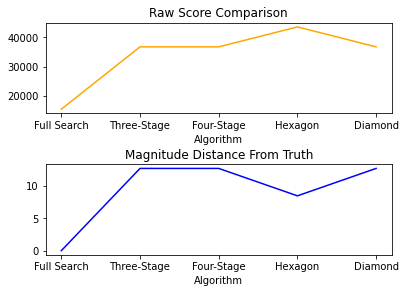

In [148]:
truthCoordinates = fullSearchScore[1]
totalResults = [fullSearchScore, threeStageScore, fourStageScore, hexagonScore, diamondScore]

errorList = []
scoreList = []
for result in totalResults:
    magnitudeError = sqrt((truthCoordinates[0] - result[1][0])**2 + (truthCoordinates[0] - result[1][0])**2)
    errorList.append(magnitudeError)
    scoreList.append(result[0])

x_axis = ['Full Search', 'Three-Stage', 'Four-Stage', 'Hexagon', 'Diamond']
plt.subplot(2, 1, 1)
plt.title('Raw Score Comparison')
plt.xlabel('Algorithm')
plt.plot(x_axis, scoreList, color='orange', label='SSD Score')
plt.tight_layout(pad=2)
plt.subplot(2, 1, 2)
plt.title('Magnitude Distance From Truth')
plt.xlabel('Algorithm')
plt.plot(x_axis, errorList, color='blue', label='SSD Score')
plt.show()

The above graphs show the difference between best scores found between all the algorithms, and also takes into account how far away the best result found was from the known ground truth. Almost all of faster algorithms found the same point with the same score, save the hexagonal. The hexagonal though was slightly closer to the best scoring point as found with full search.

## Calculations Required
All of the algorithms use the same companion SSD function, that relies on the kernel size of the search window. 
This function generates a K*K*3 amount of computations, due to the subtraction then the addition of the squared differences.

** The following calculations do not factor in the efficiency of the math for moving the search window around, only the amount of calculations for each window

### Full Search
Full search will search almost the entire NxN image table. The margins will be floor_division(K), so the overall calculations will be N-margin x N-margin. This yields a very high time complexity


(N-(margin * 2)) * (N-(Margin * 2)) * K * K * 3

### Three-Stage Search
Given the pattern of the three-stage search, each round no longer relies on the size of the image table, just that there will be 9 searches per round of the SSD calculation of the KxK kernel. This assumes no dynamic programming techniques to simplify and speed up calculations.


(9+9+9) * K * K * 3

### Four-Stage Search
While similar to the three stage search, this can either yield a lower calculation total* or a slightly higher one.

Best Case Scenario:

(9+9+9) * K * K * 3

Worst Case Scenario:

(9+9+9+9) * K * K * 3

*The above could be reduced by using dynamic programming to store previously calculated pixels

### Hexagon Search
Hexagon search branches out in a more assymetrical way than all the previous searches. It further reduces comput complexity by reducing the amount of calculations at each stage. It does however have less breadth, and may be more prone to missing the target.

Best Case Scenario:

(7+7+5) * K * K * 3

Worst Case Scenario:

(7+7+5) * K * K * 3

### Diamond Search
Diamond search like hexagon search uses a non-square search pattern. This search method uses the same amount of calculations as the square patterns, just rotated and it covers less ground with a tighter step in the y direction

Best Case Scenario:

(9+9+5) * K * K * 3

Worst Case Scenario:

(9+9+5) * K * K * 3

